In [42]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

## Name: Parthav Joshi
## Roll No: C045

In [43]:
train_path = './exp4/USA_Housing.csv'

train = pd.read_csv(train_path)

display(train.head())
display(train.shape)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


(5000, 7)

In [44]:
train.drop(columns = ['Address'], axis = 1, inplace = True)

In [45]:
X = train.iloc[:, :-1] # input feature
y = train.iloc[:,-1] # output features
display(X)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472
...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035
4996,78491.275435,6.999135,6.576763,4.02,25616.115489
4997,63390.686886,7.250591,4.805081,2.13,33266.145490
4998,68001.331235,5.534388,7.130144,5.44,42625.620156


In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

## Multiple Linear Regression

In [47]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [48]:
preds = model.predict(X_test)

In [49]:
from sklearn.metrics import r2_score, mean_squared_error
r2 = r2_score(y_test, preds)

In [50]:
print(r2)

0.9103875816065485


In [51]:
from sklearn.linear_model import Ridge, Lasso
ridge = Ridge()
ridge.fit(X_train, y_train)
preds = ridge.predict(X_test)

In [52]:
r2 = r2_score(y_test, preds)

In [53]:
r2

0.9103874324962494

In [54]:
lasso = Lasso(alpha = 1, normalize = True)
lasso.fit(X_train, y_train)
preds = lasso.predict(X_test)
r2 = r2_score(y_test, preds)
r2

0.9103875650512616

## Simple Linear Regression

In [55]:
train.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


In [56]:
X = train.loc[:, 'Avg. Area Income'] # input feature
y = train.iloc[:,-1] # output features
display(X)
display(y)

0       79545.458574
1       79248.642455
2       61287.067179
3       63345.240046
4       59982.197226
            ...     
4995    60567.944140
4996    78491.275435
4997    63390.686886
4998    68001.331235
4999    65510.581804
Name: Avg. Area Income, Length: 5000, dtype: float64

0       1.059034e+06
1       1.505891e+06
2       1.058988e+06
3       1.260617e+06
4       6.309435e+05
            ...     
4995    1.060194e+06
4996    1.482618e+06
4997    1.030730e+06
4998    1.198657e+06
4999    1.298950e+06
Name: Price, Length: 5000, dtype: float64

In [57]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
x_train = x_train.values.reshape(-1, 1)
x_test = x_test.values.reshape(-1, 1)

In [58]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [59]:
preds = model.predict(x_test)

In [60]:
from sklearn.metrics import r2_score, mean_squared_error
r2 = r2_score(y_test, preds)

In [61]:
print(f'The r2 score is: {r2}')

The r2 score is: 0.4344183604569688


(50, 1)
(50, 1)


Text(0, 0.5, '')

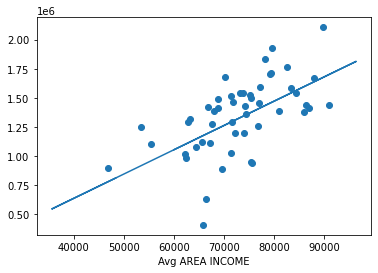

In [74]:
x_train = pd.DataFrame(x_train)
y_train = pd.DataFrame(y_train)
x_train = x_train.loc[:49, :]
y_train = y_train[0:50]
print(x_train.shape)
print(y_train.shape)
plt.scatter(x_train.values, y_train.values)
plt.plot(x_test,preds)
plt.xlabel('Avg AREA INCOME')
plt.ylabel('')